# Lab 4
## More Data Scraping and EDA

In this lab, you will improve your skills in scraping data from web pages, organizing the data in a desired format, and performing EDA.

For this lab, we are reusing code from Harvard's CS109: https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

## Lab3.A. Run code for scraping Indeed.com data

You firs task will be to exectute the following blocks of code and try to understand what is happening after each line of the code. You will have to answer several questions to show your understanding.

Let us start with importing of the relevant packages.

In [1]:
import requests
import bs4 #this is beautiful soup

import time
from pandas import Series
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

As you see, you imported the package called `re`, which supports regular expression operations. You have already used the other packages. 

The following block will access and load the contents of an Indeed.com web page. It will probably give you a warning -- please ignore it.

In [2]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = requests.get(url).text
# parse html code
bs_tree = bs4.BeautifulSoup(source)

**Question 1**:
 * What kind of page did you land on? Explain in a few sentences what is the content of this page.
 * What does the "?" and "&" in the url mean?
 * Explore the content of the web page. If you are using Firefox, open the page Inspector to understand how the underlying html code relates to the displayed content.
 * What pieces of the html code are responsible for showing the job title, company name, and job location?
 
The following block of code will figure out how many job ads are there for jobs that contain "data scientist' in the job title.

<html>
    <h3>
        What kind of page did you land on?   
    </h3>
    <p>
   <i>
        <strong>
            I landed on an Indeed job-search page with "data scientist" in the "What (job title, keywords, or company)" user input box in the search area at the top of the page. No location was specified so the job-search results, displayed in the center of the page, where job openings from all over the United States. On the left side of the page were different categories to sort/filter the job-search results. Overall this page displayed information on open data science jobs in the United States, while providing some information on the current salary market for data scientist on the right side.
        </strong>
    </i>
    </p>
</html> 

<html>
    <h3>
        What does the "?" and "&" in the url mean?   
    </h3>
    <p>
       <i>
        <strong>
                "?" in the URL acts as a separator, it indicates the end of the URL resource path and start of query parameters. 
                "&" in the URL separates the query string field-value pairs.
        </strong>
       </i>
    </p>
</html>

<html>
     <h3>
        What pieces of the HTML are responsible for showing the job title, company name, and job location?   
    </h3>
    <p>
      <i>
        <strong>
            The HTML code below was responsible for the first job title, company name, and job location result on my job-search page:
             <p>
                 <i>
                    <strong>
                Specifically this HTML below was responsible for the job title:
                     </strong>
                 </i>
            </p>
          </strong>
        </i>
    </p>
          
               <a target=​"_blank" id=​"sja1" data-tn-element=​"jobTitle" class=​"jobtitle turnstileLink" href=​"/​pagead/​clk?​mo=r&​ad=-6NYlbfkN0Do5IJpsXwEG6AHc2aCg9wxC4VDeKn3sAvOnRJ-W7avdIgQv2Y-n1dX5QotCd4QCXn43OLFDrscqoale7OyjFOsotpXvsNjP_0J2JUp3HPUwEYrUVAM8wN-9Q-u4TtfJ04H09AByTC4SJOT2T3W_mIhQIeYYJ5I4mUYCBbyzhW3sRcO_zvlQegnD5meaPiGz0JKzOBYLQmfhjcQKpG4R9eDnZjamHTFcOStkDiTbqkGQa1qelhCIPBRYKJFaZMSAwqZLVmg-tvCfmLFHsA462lwAG9wsOLZwPUmaaENHQnROYrVOwG53OuwvAYsQSqzAOc4RdiL0Y-DCHM8J0E3AF-GxAVyn5Gxo3Dx178UDFZxB2NDJrqTfdKPWbBE-7888a7eoK8EaBMlSYicup8wYq5gp--BWUZ6EFfHOu3LJn2yn8JojmEQ_ekUKpUwct00fizGkwEt1_P7atxjvG0nCKc2vTuJOKy0nuhxfd538GIl2ZoHGpuQ90zyvhQifKHDLroOxGEb_YrapsrWfzMMMXiBAs5XPlaFgoSNdDLBE7bpYrFWH5nP_nftSRjaOAgXOBxm7rUX6RTIf_DeiqrgnVAFIuR3t14bjWju8ywbFd02rTiouVtnb6hcfEi3-h70LZlFvPPiL9XyC2IosOrpF08rKqcx6mikP12SGcKfl0zVCUnR3V7_uPsp3SGs4QYlarb0Vu4VZqHGalfnKzvfcVwzZbrAnohEi0FZfAq9If1xVDDKihqP7yynBmXE3dFGAL3IZgTNTGTWuzmo7HpgIDFN6qGqI9_TbOiTzJZ4NUKfA4qbqHnkgt1HfkTWC6dNc0CCRYOl0rvVrR6Vse0ghYiq7AkK7cZlrKAV7hP5XvP0FEDBV5dZJxWOqjxjitPcE0Fp2oLoDGLi8TkUttyMB4uRIEcEc1q1pe6Qg8xV9fyn3Q==&​vjs=3&​p=1&​sk=&​fvj=0" title=​"Data Scientist" rel=​"noopener nofollow" onmousedown=​"sjomd('sja1')​;​ clk('sja1')​;​" onclick=​"setRefineByCookie([]​)​;​ sjoc('sja1',0)​;​ convCtr('SJ')​">​…​</a>​
              
 <p>
  <i>
    <strong>
      The HTML below was responsible for the company name:
    </strong>
  </i>
 </p>
 
    <div>​
     <span class=​"company">​
      <a data-tn-element=​"companyName" class=​"turnstileLink" target=​"_blank" href=​"/​cmp/​Onemain" onmousedown=​"this.href = appendParamsOnce(this.href, 'from=SERP&​campaignid=&​fromjk=b6d47be12a30e20a&​jcid=682e3d251b8703b7')​" rel=​"noopener">​
        OneMain Financial​</a>​
     </span>​
    </div>​
 <p>
  <i>
    <strong>
      The HTML below was responsible for the company location:
    </strong>
  </i>
 </p>
    
    <div class=​"location">​Wilmington, DE 19805​</div>​
    </div>​    
        
   </strong>
  </i>
 </p>
</html>

In [3]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
job_count_string = job_count_string.split()[-2]
print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print(job_count)

Search yielded 33,527 hits.
33527


# **Question 2**:
* What does the "find(id = 'searchCount')" in the first line mean?
* What does the second line do?

**Question 3**: 
* Write a piece of code that finds the Salary Estimate object on the page

The following piece of code allows you to find the links to all the job ads on the page.

<html>
     <h3>
       Question 2: What does the "find(id = 'searchCount')" in the first line mean?
    </h3>
    <p>
      <i>
        <strong>
            This line finds the id = 'searchCount' in the html code saved in the variable bs_tree. Id's are unique in websites so there is only one id by that name. Once the id is found the text inside the id's div is returned, for the given instance that means "        Page 1 of 33,576 jobs" is stored in job_count_string.
          </strong>
        </i>
    </p>     

<html>
     <h3>
        Question 2: What does the second line do?
    </h3>
    <p>
      <i>
        <strong>
            The second line splits the job_count_string by the spaces, so "        Page 1 of 33,576 jobs" becomes [u'Page', u'1', u'of', u'33,576', u'jobs']. Finally, [-2] steps backward two positions from the end of job_count_string to print "33,576". 
          </strong>
        </i>
    </p>

<html>
     <h3>
        Question 3: (code below)
    </h3>

In [4]:
# see how many job postings we found
Salary_Estimate_string = bs_tree.find(id = 'rb_Salary Estimate')
print Salary_Estimate_string

<div class="rbSection rbOpen" id="rb_Salary Estimate">
<div class="rbHeader">
<span aria-level="3" class="ws_bold" role="heading">
				Salary Estimate</span>
</div>
<div class="rbsrbo" id="SALARY_rbo">
<ul class="rbList">
<li onmousedown="rbptk('rb', 'salest', '1');">
<a href="/q-data-scientist-$55,000-jobs.html" rel="nofollow" title="$55,000 (26410)">$55,000</a> (26410)</li>
<li onmousedown="rbptk('rb', 'salest', '2');">
<a href="/q-data-scientist-$75,000-jobs.html" rel="nofollow" title="$75,000 (21489)">$75,000</a> (21489)</li>
<li onmousedown="rbptk('rb', 'salest', '3');">
<a href="/q-data-scientist-$95,000-jobs.html" rel="nofollow" title="$95,000 (15875)">$95,000</a> (15875)</li>
<li onmousedown="rbptk('rb', 'salest', '4');">
<a href="/q-data-scientist-$110,000-jobs.html" rel="nofollow" title="$110,000 (11312)">$110,000</a> (11312)</li>
<li onmousedown="rbptk('rb', 'salest', '5');">
<a href="/q-data-scientist-$130,000-jobs.html" rel="nofollow" title="$130,000 (5408)">$130,000</a> (

In [5]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)
    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

('We found a lot of jobs: ', 16)


In [6]:
job_links

['http://www.indeed.com/viewjob?jk=d094066d7847bcd4',
 'http://www.indeed.com/viewjob?jk=147327f827ef98a1',
 'http://www.indeed.com/viewjob?jk=dffbf83b18a43159',
 'http://www.indeed.com/viewjob?jk=94754949a0468a52',
 'http://www.indeed.com/viewjob?jk=c29ec10470153175',
 'http://www.indeed.com/viewjob?jk=1486f8bbb9d68d93',
 'http://www.indeed.com/viewjob?jk=738fe6188daacd19',
 'http://www.indeed.com/viewjob?jk=851d784993c4eb81',
 'http://www.indeed.com/viewjob?jk=b485521dd0cffb12',
 'http://www.indeed.com/viewjob?jk=b6c6149172fdf5c6',
 'http://www.indeed.com/viewjob?jk=08106ff509c9c18b',
 'http://www.indeed.com/viewjob?jk=3732427d3a63339e',
 'http://www.indeed.com/viewjob?jk=71ee734828db70f6',
 'http://www.indeed.com/viewjob?jk=e8f2ab289cd31d0d',
 'http://www.indeed.com/viewjob?jk=43f1727417779980',
 'http://www.indeed.com/viewjob?jk=bd8c2d6cefcffeab']

**Question 4**:
* explain why is `url` (first line in the for loop) defined as it is. What page are you landing at when `i = 3`?

* What does command `''bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})` do?
* Explain the properties and content of `job_links`

**Question 5**:
* Reuse the code above to find links to the first 200 listed data science jobs

The following piece of code accesses and grabs the content of all ads in the `job_links` and extracts all the human-readable text tokens. Then, it counts on how many pages are words `mapreduce`, `spark`, and `visualization` used. It might take a few seconds to execute.

<html>
     <h3>
        Question 4:   
    </h3>
    <p>
      <i>
        <strong>
           explain why is url (first line in the for loop) defined as it is. What page are you landing at when i = 3?
          </strong>
             <p>
                 <i>
                - The url is defined this way becuase it is prepared to step through any given number of search result pages, so as i increases the url will be concatenated with a string to make sure we never scrape the same job listing twice. 
                     <br>
                - page when i = 3: 'http://www.indeed.com/viewjob?jk=94754949a0468a52'>
                 </i>
            </p>
        </i>
    </p>      
 <p>
  <i>
    <strong>
      What does command ''bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'}) do?
    </strong>
  </i>
 </p>
    <i>
         The above command finds all the instances of div's that start with, 'div class="jobsearch-SerpJobCard'
    </i>
 <p>
  <i>
    <strong>
      Explain the properties and content of job_links:
    </strong>
  </i>
 </p>
  <p>
      <i>
        job_links is a list of url's concatenated with '/viewjob?jk=' and the different id's we collected from 'bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})' to load a specific job page. This creates a list of the dedicated individual pages for each job posted on the indeed search results page we're scraping.
      </i>
 </p>
</html>


<html>
     <h3>
        Question 5:   
    </h3>
</html>
    

In [7]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(13): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)
    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

('We found a lot of jobs: ', 207)


In [14]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0}
counter = 0
for link in job_links:
    counter +=1  
    
    try:
        html_page = requests.get(link).text
    except urllib2.HTTPError:
        print("HTTPError:")
        continue
    except urllib2.URLError:
        print("URLError:")
        continue
    except socket.error as error:
        print("Connection closed")
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print(len(job_links) - counter)
        print(skill_set)
            
print(skill_set)

13
{'visualization': 2, 'spark': 1, 'mapreduce': 0}
8
{'visualization': 4, 'spark': 2, 'mapreduce': 0}
3
{'visualization': 5, 'spark': 3, 'mapreduce': 1}
{'visualization': 6, 'spark': 4, 'mapreduce': 1}


**Question 6**
* What does the `re.sub()` do in the above code? To answer this, you will have to go to the documentation of the regular expression package (find it on web).
* What is the meaning of `[^a-z.+3]`?
* What is the content of `skill_set`?

The following piece of code plots the counts of different skills in the processed ads.

<html>
     <h3>
        Question 6:   
    </h3>
    <p>
      <i>
        <strong>
           re.sub() return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a single newline character, \r is converted to a linefeed, and so forth. Unknown escapes such as \j are left alone. Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern.

   The meaning of [^a-z.+3] means matche atleast three characters from a-z.

   The content of skill_set is the key word that will be search through in the html text
          </strong>
             </p>
           </html>      


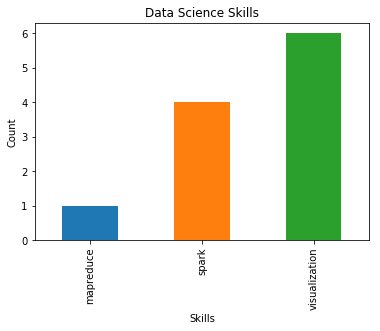

In [15]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

**Question 7**:
- rerun the code to find the counts of the 3 data science skills on the first 200 job ads

## Lab 3.B: Data analysis of job skills
In the first part of the lab, you created `skill_set` dictionary that counts occurences of 3 important data science skills. In this part of the lab we are asking you to create pandas `DataFrame` object as a table whose rows correspond to individual ads and columns correspond to important information about the ads and skills mentioned on those pages. Let us call the table `job_ads`. Process the first 1,000 data science ads, so your table should have 1,000 rows. For each ad, you will have to create the following columns:
- job title
- company name
- job location
- skill 1
- skill 2
- ...
- skill 20

Job title, company name, and job locations will be readable from the Indeed.com page. We are asking you to list 20 skills, instead of only 3 in the code above ('mapreduce', 'spark', 'visualization'). You will need to find another 17 words that are commonly used in data science job ads. To do it, please explore the content of at least 10 ads.

Once you creat your `job_ads` table, please preform EDA of the table, in a similar way you did in Lab 2: provide code and a 2-page document that summarizes interesitng insights about the first 1,000 data science jobs.

**Deliverables**:
- the modified Lab 4 .ipynb file that contains all the answers to the questions
- a 2-page documents presenting the results of your EDA of the `job_ads` data